# Aprendizaje Automático
## Actividad 1: Árboles y random forest para regresión y clasificación
### Luis Rafael Castillo Rico


### Notas importantes

Este código no es óptimo, su objetivo no es optimizar los recusos de la máquina sino ilustrar el proceso para crear el modelo. Muchas de las líneas podrían optimizarse o incluso quitarse y el código seguiría arrojando los mismos resultados, sin embargo, se muestran partes importantes en el desarrollo de una manera ilustrativa. Su objetivo es principalmente informativo.

El código esta hecho para correse de arriba hacia abajo, es decir, si no se corre en orden, o si se intenta volver a correr una celda habiendo corrido algunas posteriores, podría arrojar resultados diferentes. Si se desea volver a correr una celda ya habiendo corrido las posteriores recomiendo mejor reiniciar el kernel y correr las celdas desde el inicio para evitar resultados extraños.

Importando librerías

In [1]:
# librerías básicas
import pandas as pd
import numpy as np

# scipy
from scipy.stats import norm
from scipy import stats

# preparación
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# métricas regresión
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# métricas clasificación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# balanceo
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# librerías de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Análisis descriptivo de los datos

Importando el archivo a un dataframe.

Fuente: https://www.kaggle.com/gpandi007/usa-housing-dataset 

In [2]:
df_train = pd.read_csv('housing_train.csv')

Forma del dataframe

In [3]:
df_train.shape

(1460, 81)

Variables del dataframe:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

- SalePrice: el precio de venta de la propiedad en dólares. Esta es la variable de destino que está tratando de predecir.
- MSSubClass: la clase de construcción
- MSZoning: La clasificación general de zonificación
- LotFrontage: Pies lineales de calle conectados a la propiedad
- LotArea: tamaño del lote en pies cuadrados
- Street: (calle) Tipo de acceso por carretera
- Alley: (callejón) Tipo de acceso al callejón
- LotShape: forma general de la propiedad
- LandContour: Planitud de la propiedad
- Utilities: Tipo de utilidades disponibles
- LotConfig: configuración de lotes
- LandSlope: Pendiente de la propiedad
- Neighborhood: (vecindario) ubicaciones físicas dentro de los límites de la ciudad de Ames
- Condition1: Proximidad a carretera principal o vía férrea
- Condition2: Proximidad a la carretera principal o vía férrea (si hay una segunda presente)
- BldgType: Tipo de vivienda
- HouseStyle: Estilo de vivienda
- OverallQual: calidad general del material y del acabado
- OverallCond: calificación de condición general
- YearBuilt: Fecha de construcción original
- YearRemodAdd: fecha de remodelación
- RoofStyle: Tipo de techo
- RoofMatl: material del techo
- Exterior1st: Revestimiento exterior de la casa
- Exterior2nd: revestimiento exterior de la casa (si hay más de un material)
- MasVnrType: tipo de chapa de mampostería
- MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
- ExterQual: calidad del material exterior
- ExterCond: Estado actual del material en el exterior
- Foundation: Tipo de cimentación
- BsmtQual: Altura del sótano
- BsmtCond: Estado general del sótano
- BsmtExposure: paredes de sótanos a nivel del jardín o de salida
- BsmtFinType1: calidad del área terminada del sótano
- BsmtFinSF1: Tipo 1 pies cuadrados terminados
- BsmtFinType2: calidad de la segunda área terminada (si está presente)
- BsmtFinSF2: Tipo 2 pies cuadrados terminados
- BsmtUnfSF: pies cuadrados sin terminar del área del sótano
- TotalBsmtSF: pies cuadrados totales del área del sótano
- Heating: Tipo de calefacción
- HeatingQC: calidad y condición de la calefacción
- CentralAir: aire acondicionado central
- Eléctrico: Sistema eléctrico
- 1stFlrSF: pies cuadrados del primer piso
- 2ndFlrSF: pies cuadrados del segundo piso
- LowQualFinSF: Pies cuadrados terminados de baja calidad (todos los pisos)
- GrLivArea: Pies cuadrados de superficie habitable sobre el nivel del suelo (suelo)
- BsmtFullBath: baños completos del sótano
- BsmtHalfBath: Medios baños del sótano
- FullBath: Baños completos sobre rasante
- HalfBath: Medios baños sobre el nivel del suelo
- Bedroom: número de dormitorios por encima del nivel del sótano
- Kitchen: Número de cocinas
- KitchenQual: calidad de la cocina
- TotRmsAbvGrd: Total de habitaciones sobre rasante (no incluye baños)
- Functional: calificación de la funcionalidad del hogar
- Fireplaces: Número de chimeneas
- FireplaceQu: calidad de chimenea
- GarageType: ubicación del garaje
- GarageYrBlt: año en que se construyó el garaje
- GarageFinish: Acabado interior del garaje
- GarageCars: tamaño del garaje en capacidad de automóviles
- GarageArea: tamaño del garaje en pies cuadrados
- GarageQual: calidad de garaje
- GarageCond: estado del garaje
- PavedDrive: entrada pavimentada
- WoodDeckSF: área de la cubierta de madera en pies cuadrados
- OpenPorchSF: área de porche abierto en pies cuadrados
- EnclosedPorch: área de porche cerrado en pies cuadrados
- 3SsnPorch: Área de porche de tres estaciones en pies cuadrados
- ScreenPorch: área de porche de pantalla en pies cuadrados
- PoolArea: área de la piscina en pies cuadrados
- PoolQC: calidad de la piscina
- Cerca: calidad de la cerca
- MiscFeature: característica miscelánea no incluida en otras categorías
- MiscVal: Valor de la característica miscelánea
- MoSold: mes vendido
- YrSold: Año de venta
- SaleType: Tipo de venta
- VentaCondición: Condición de venta

Primeros renglones del dataframe

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Información de las columnas del dataframe

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Descripción a grandes rasgos de las variables numérticas

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Descripción de la variable objetivo

In [7]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Histograma de la variable objetivo

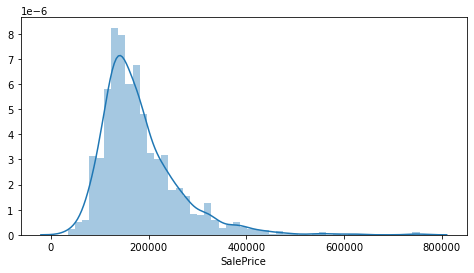

In [8]:
plt.figure(figsize=(8,4))
sns.distplot(df_train['SalePrice'])
plt.ylabel('')
plt.show()

Dividiendo columnas numéricas y categóricas

In [9]:
objetos =[]
numeros=[]

for i in df_train.columns:
    if df_train.dtypes[i] == 'object':
        objetos.append(i)
    else:
        numeros.append(i)

tipos_de_datos = {'objetos':objetos,'numeros':numeros}

### Hipótesis de variables importantes

Analizando las distribuciones de las variables categóricas.

Veamos que tanto afectan a la variable objetivo las variables categóricas:

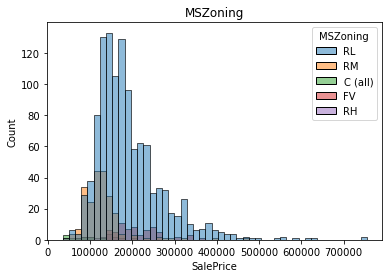

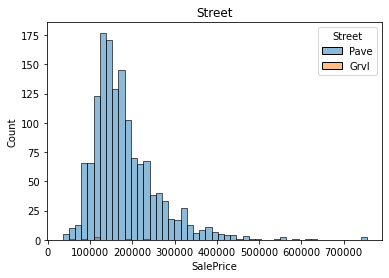

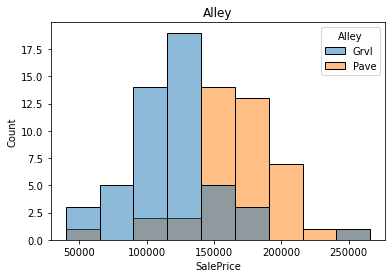

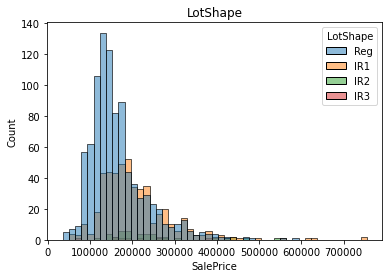

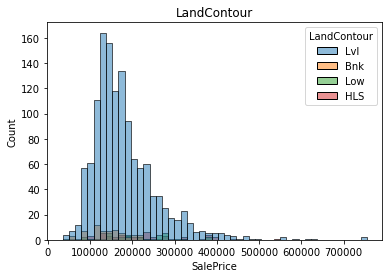

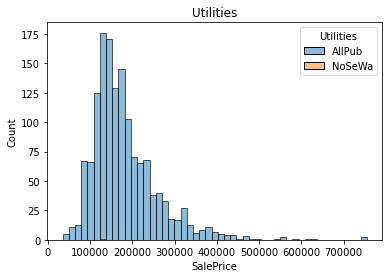

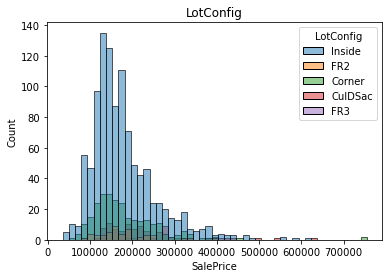

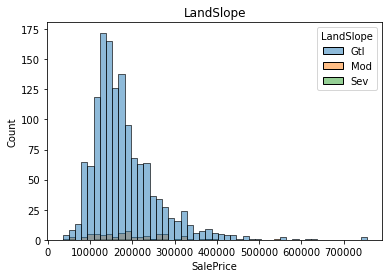

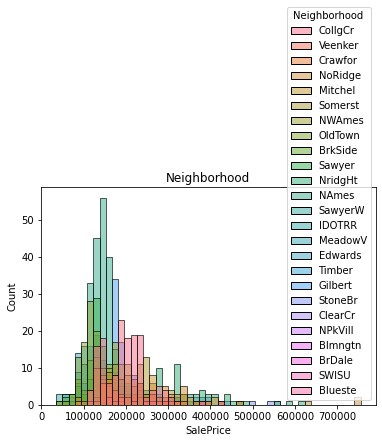

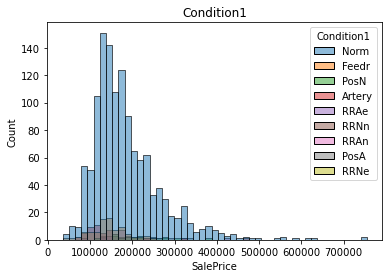

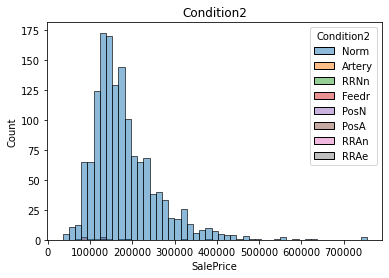

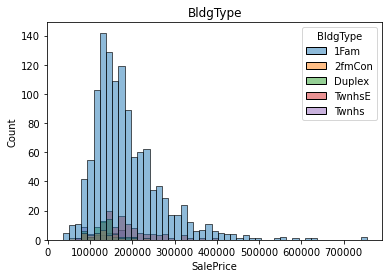

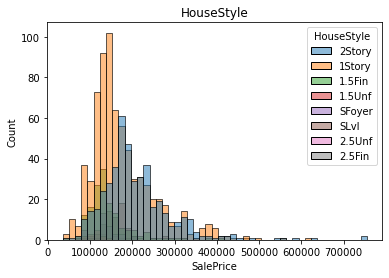

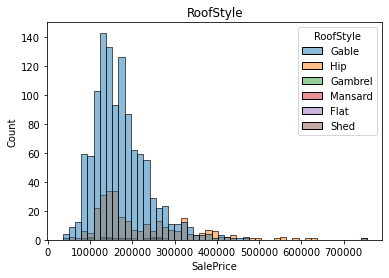

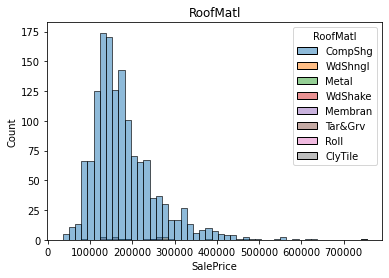

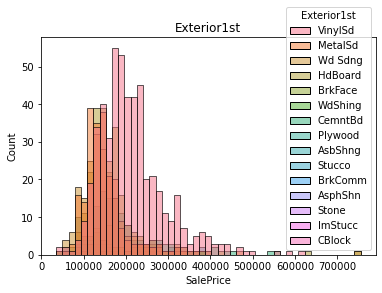

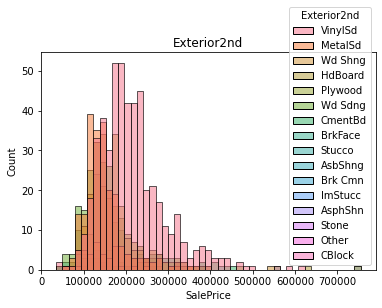

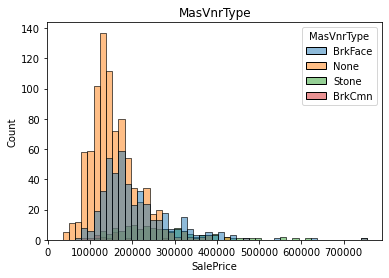

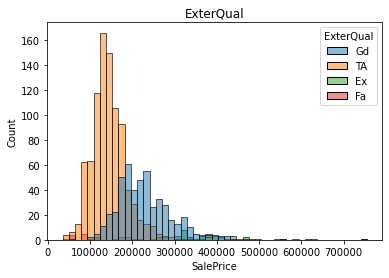

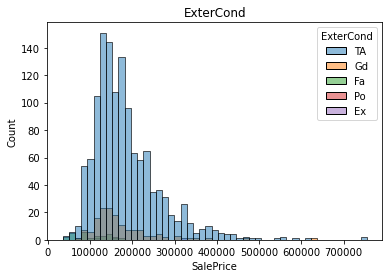

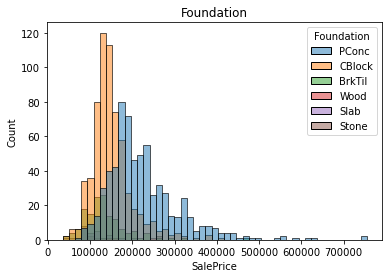

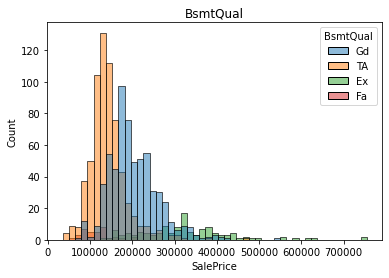

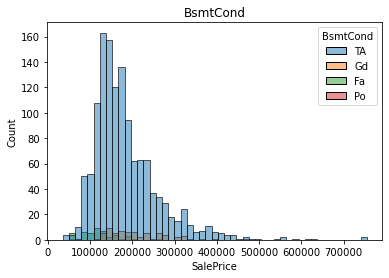

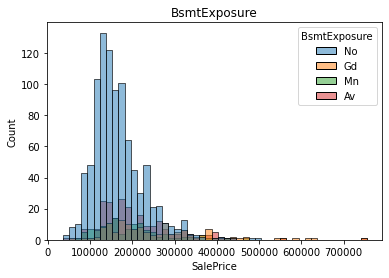

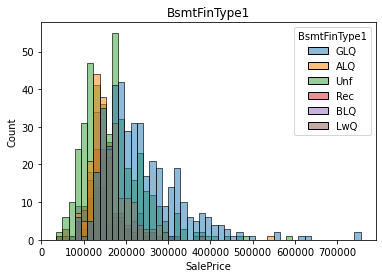

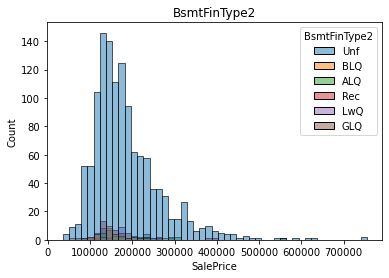

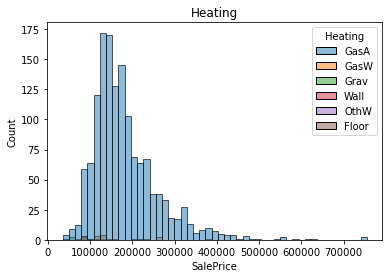

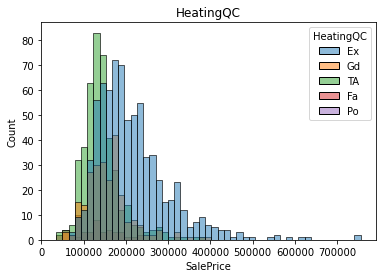

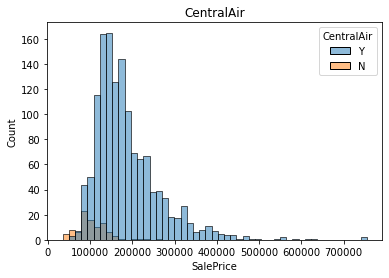

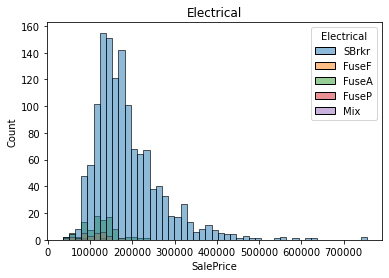

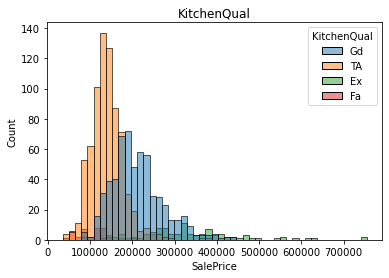

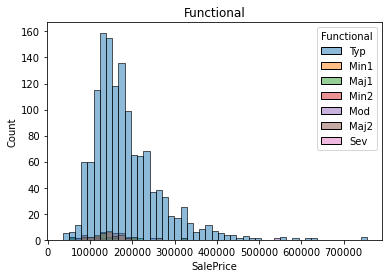

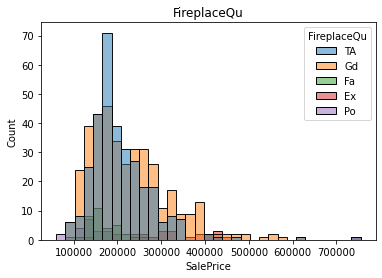

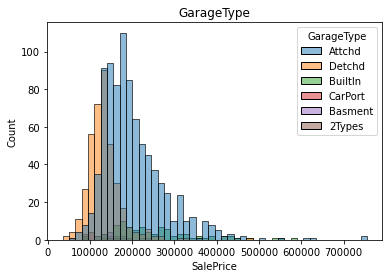

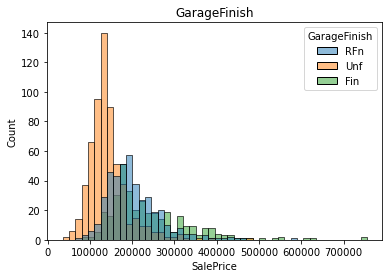

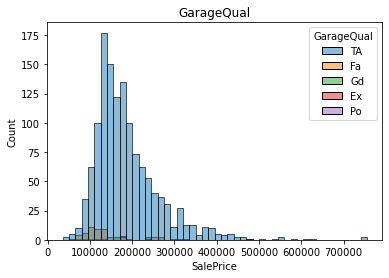

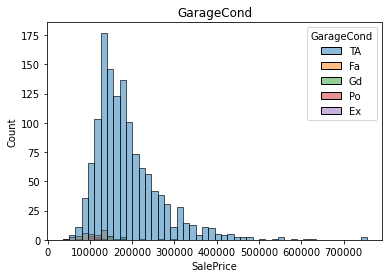

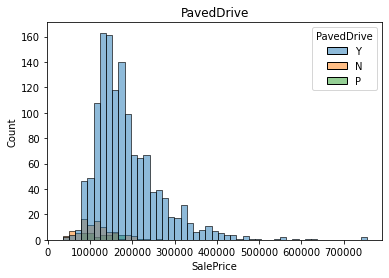

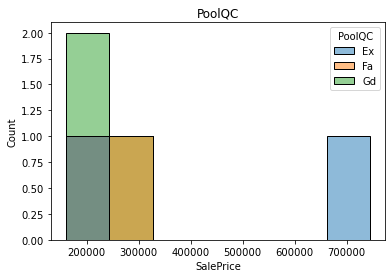

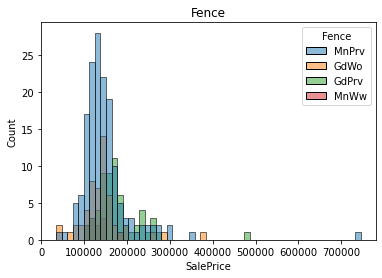

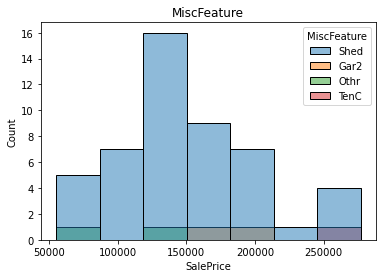

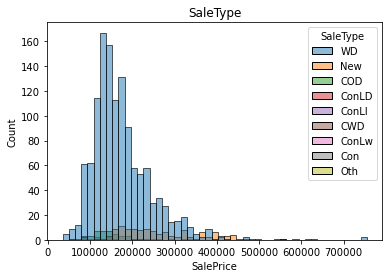

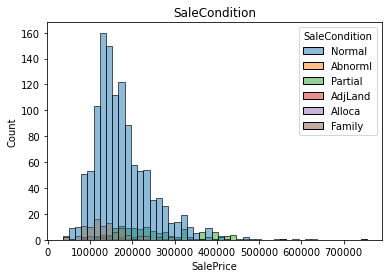

In [10]:
for i in tipos_de_datos['objetos']:
    sns.histplot(data=df_train, x='SalePrice', hue=i)
    plt.title(f'{i}')
    plt.show()

Graficando las variables numéricas vs la variable objetivo

Id


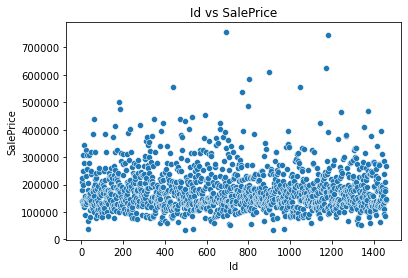

MSSubClass


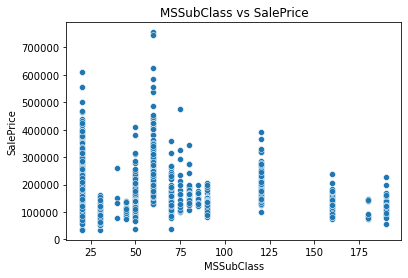

LotFrontage


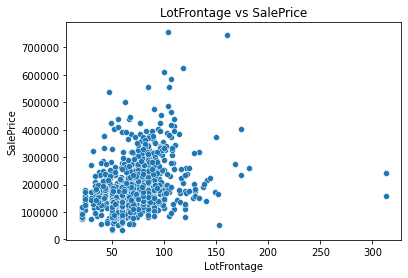

LotArea


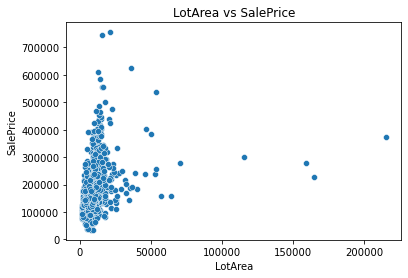

OverallQual


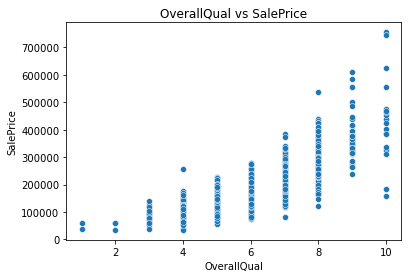

OverallCond


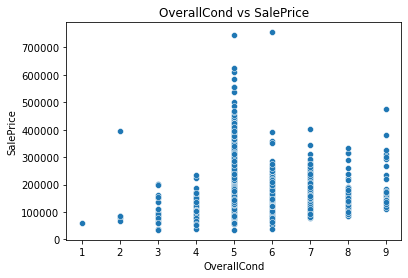

YearBuilt


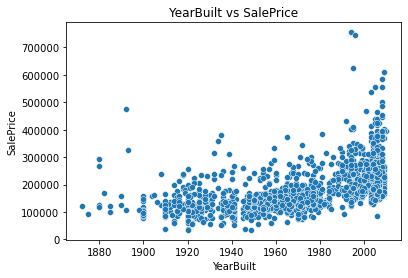

YearRemodAdd


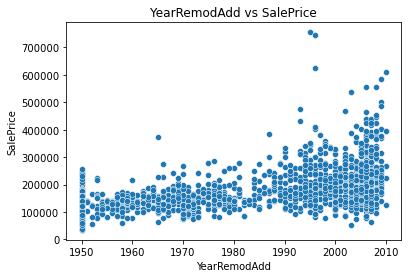

MasVnrArea


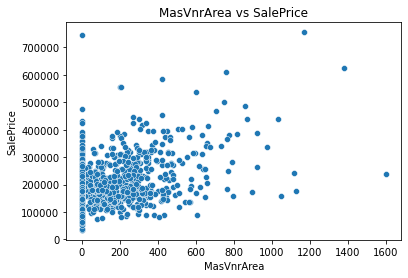

BsmtFinSF1


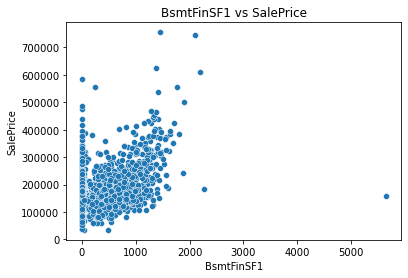

BsmtFinSF2


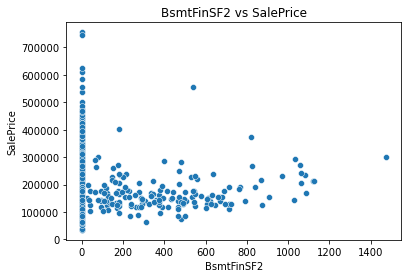

BsmtUnfSF


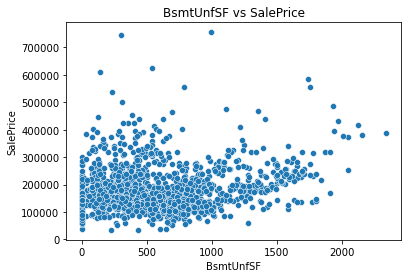

TotalBsmtSF


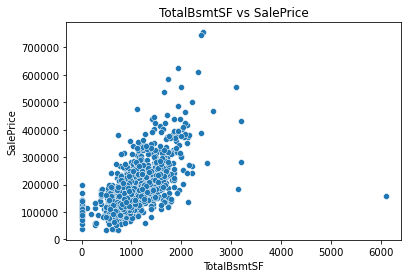

1stFlrSF


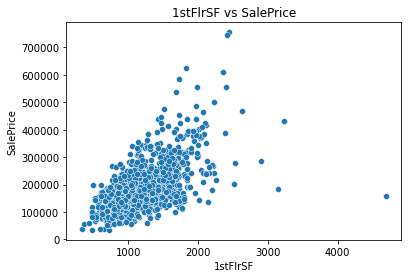

2ndFlrSF


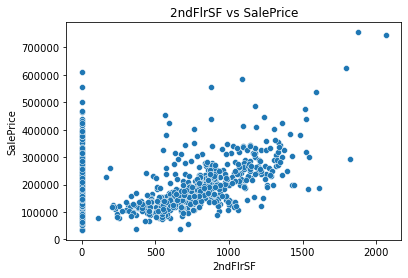

LowQualFinSF


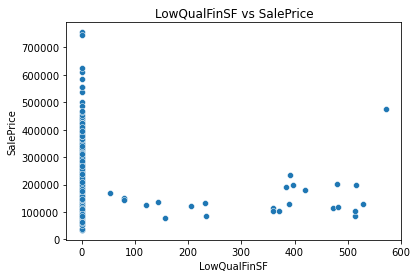

GrLivArea


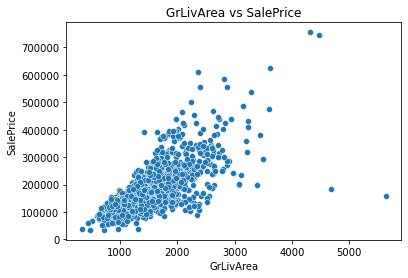

BsmtFullBath


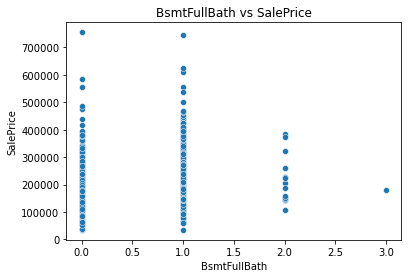

BsmtHalfBath


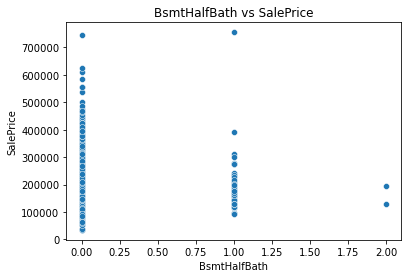

FullBath


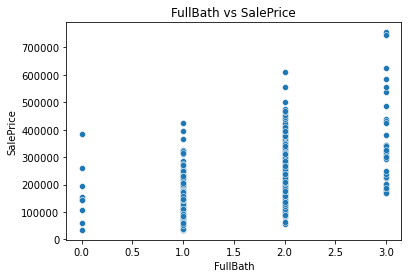

HalfBath


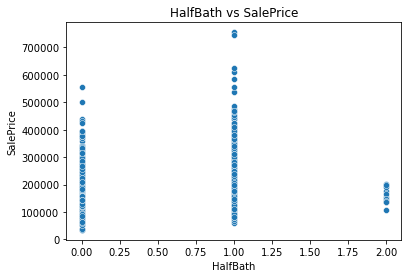

BedroomAbvGr


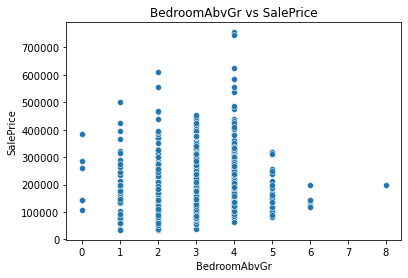

KitchenAbvGr


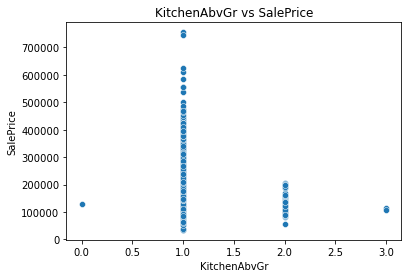

TotRmsAbvGrd


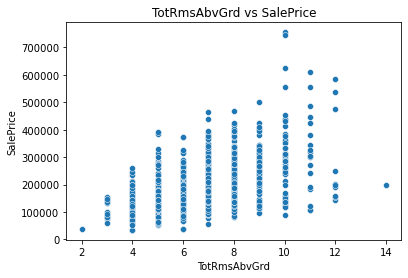

Fireplaces


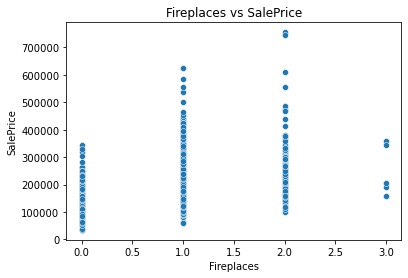

GarageYrBlt


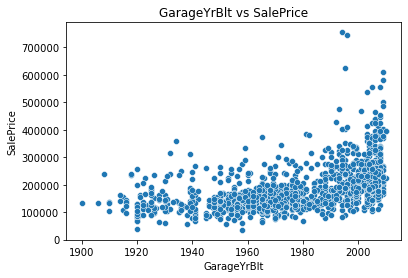

GarageCars


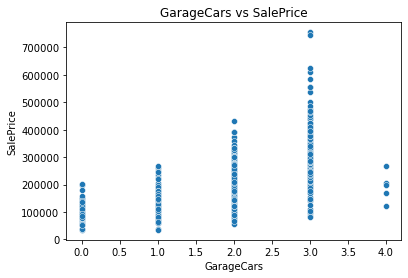

GarageArea


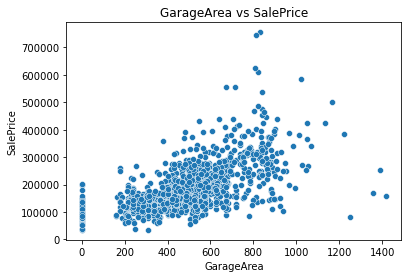

WoodDeckSF


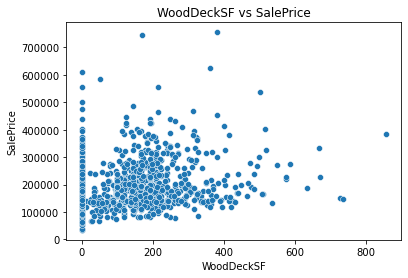

OpenPorchSF


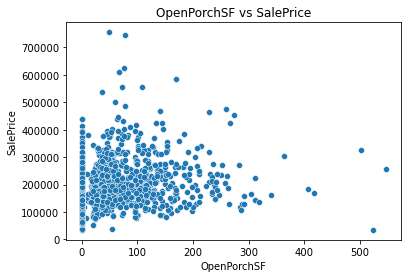

EnclosedPorch


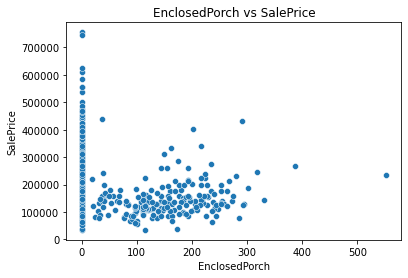

3SsnPorch


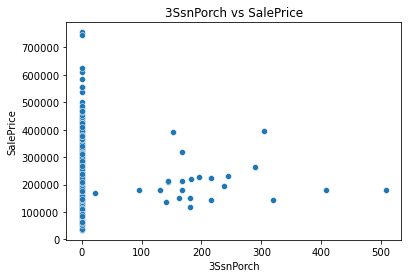

ScreenPorch


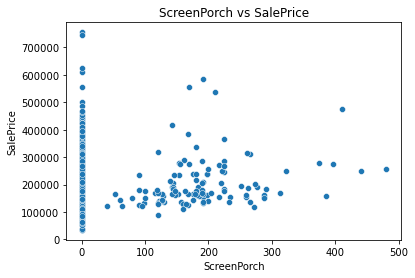

PoolArea


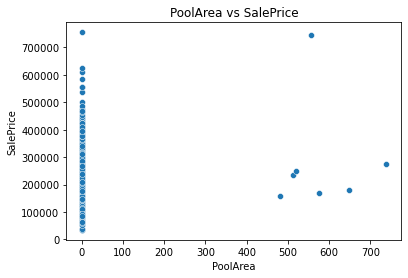

MiscVal


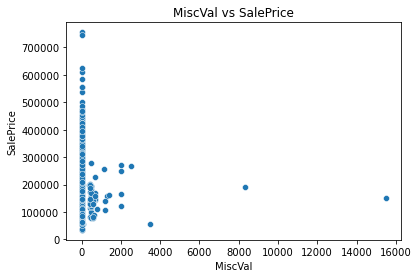

MoSold


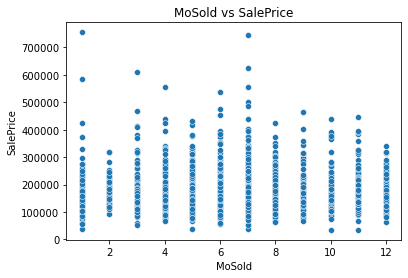

YrSold


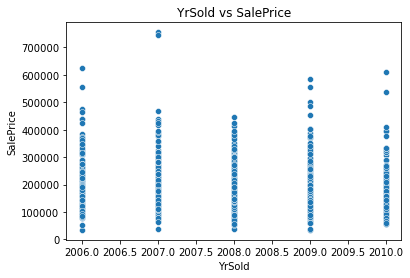

SalePrice


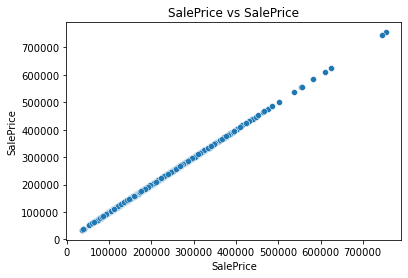

In [11]:
for i in tipos_de_datos['numeros']:
    print(i)
    sns.scatterplot(data=df_train, x=i, y='SalePrice')
    plt.title(f'{i} vs SalePrice')
    plt.show()

Embelleciendo las gráficas escogidas:

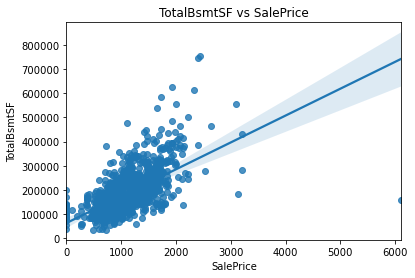

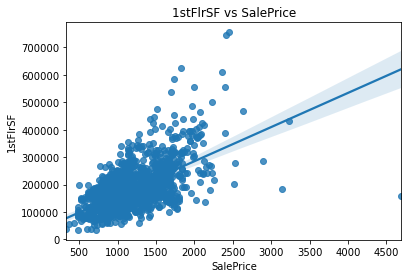

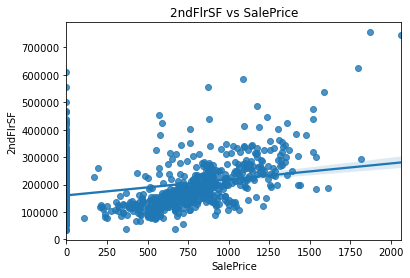

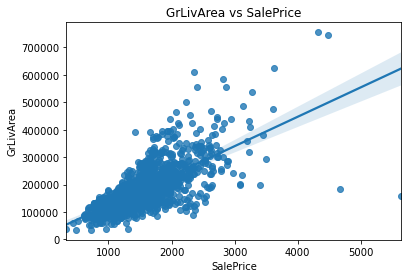

In [12]:
variables=['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea']

for variable in variables:
    sns.regplot(x=df_train[variable], y=df_train['SalePrice'])
    plt.xlabel('SalePrice')
    plt.ylabel(variable)
    plt.title(f'{variable} vs SalePrice')
    plt.show()

Boxplots

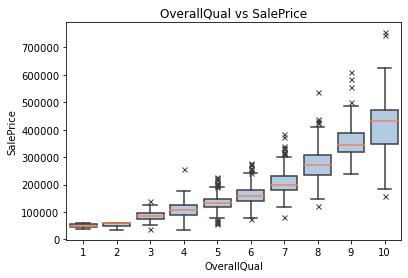

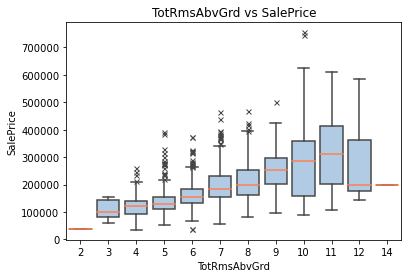

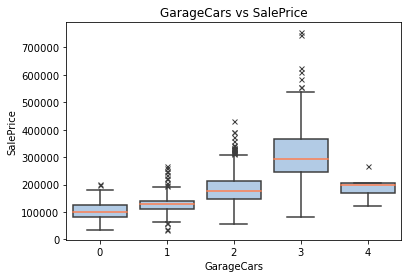

In [13]:
variables = ['OverallQual','TotRmsAbvGrd','GarageCars']
for variable in variables:
    sns.boxplot(x=variable, y="SalePrice",data= df_train[['SalePrice',variable]],
                boxprops={"facecolor": (.4, .6, .8, .5)},medianprops={"color": "coral"},flierprops={"marker": "x"})
    plt.title(f'{variable} vs SalePrice')
    plt.show()

## Selección de Variables

### Tratamiento de los datos nulos

Analizando el porcentaje de valores nulos en cada columna

In [14]:
total = len(df_train)
porcentaje_nulos = pd.DataFrame((df_train.isnull().sum()/total).sort_values(ascending=False),columns={'Porcentaje_nulos'})
porcentaje_nulos.head(10)

,Porcentaje_nulos
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


Dado que vamos a dividir a la base en un conjunto de entrenamiento y de prueba en una relación 70-30, debemos desechar a las variables que tengan un porcentaje de nulos mayor a 30%. 

Las variables con 0% de nulos son ideales y puden mantenerse en el modelo.

Debemos buscar una manera de tratar a los datos que tienen un porcentaje entre 0.001% y 30% de nulos, para esto primero debemos identificarlas:

In [15]:
df_nulos = porcentaje_nulos[(porcentaje_nulos['Porcentaje_nulos']>0) & (porcentaje_nulos['Porcentaje_nulos']<=.3)]
display(df_nulos)
lista_nulos = df_nulos.index

,Porcentaje_nulos
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479
GarageQual,0.055479
BsmtFinType2,0.026027
BsmtExposure,0.026027
BsmtQual,0.025342
BsmtCond,0.025342


Separemos a estas variables según su tipo, numérico o categórico.

In [16]:
nulos_objetos = set(lista_nulos).intersection(set(tipos_de_datos['objetos']))
nulos_numeros = set(lista_nulos).intersection(set(tipos_de_datos['numeros']))

Antes de escoger cómo se tratarán los datos nulos de estas variables, veamos si realemte vale la pena hacer dicho relleno. Para esto se revisarán las gráficas vistas anteriormente y se hará un análisis de correlación.

### LabelEncoder

Antes de seleccionar las variables, hagamos un preprocesamiento de los datos que consistirá en darle etiquetas numéricas a las variables categóricas. 

In [17]:
columnas_objeto = df_train.select_dtypes(include=['object'])
columnas_objeto = columnas_objeto.apply(preprocessing.LabelEncoder().fit_transform)
df_train_pr = df_train.drop(columns=list(columnas_objeto.columns))
for i in list(columnas_objeto.columns):
    df_train_pr[i] = columnas_objeto[i]

In [18]:
df_train_pr.shape

(1460, 81)

Tenendo estos datos procesados, procedamos primero a eliminar las variables que tengan más de 30% de valores nulos.

In [19]:
df_train_pr = df_train_pr.drop(porcentaje_nulos[porcentaje_nulos['Porcentaje_nulos']>0.3].index,1)
df_train_pr.shape

(1460, 76)

Procedamos ahora a un análisis de correlación para detectar cuales variables se relacionan más con la variable objetivo para tener un mayor número de herramientas para descartar variables.

### Análisis de correlación

Matriz de correlación

<AxesSubplot:>

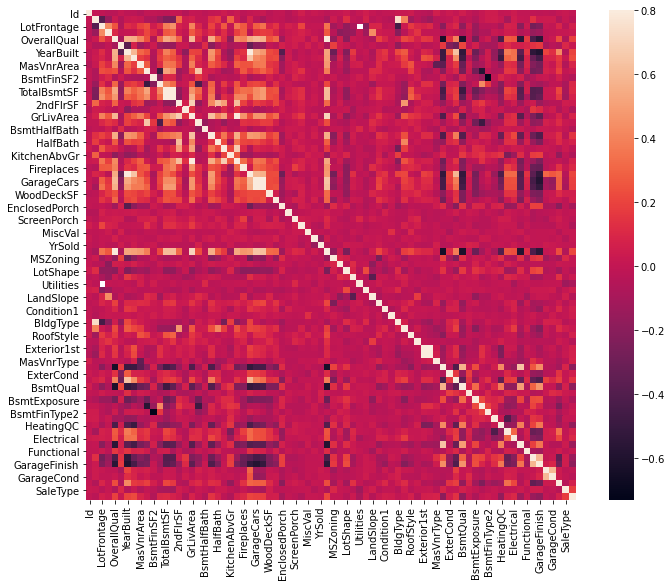

In [20]:
corrmat = df_train_pr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Veamos si es posible relacionar a una de las variables en **nulos_objetos** con otra de las variables sin nulos en el dataset. Si una variable con nulos tiene más de 33.33% de correlación con otra variable que no tenga nulos, consideraremos que puede ser sustituida y se eliminará del dataset.

In [21]:
columnas_eliminables={}

for i in nulos_objetos.union(nulos_numeros):
    correlacion_variable = corrmat[(corrmat[i]<1)][[i]].sort_values(by=i,ascending=False)
    display(correlacion_variable.head(2))
    filtro = corrmat[(corrmat[i]>1/3)&(corrmat[i]<1)][[i]].sort_values(by=i,ascending=False)
    if len(filtro)==0:
        print(i,'NO SE PUEDE SUSTITUIR')
    else:
        columna_reemplazo = correlacion_variable[i].index[0]
        if columna_reemplazo not in nulos_objetos:
            print(i,'SE PUEDE SUSTITUIR POR',columna_reemplazo)
            columnas_eliminables[i] = columna_reemplazo
        else:
            print(i,'SE PUEDE SUSTITUIR POR',columna_reemplazo,' PERO TAMBIÉN TIENE NULOS')

,GarageYrBlt
YearBuilt,0.825667
YearRemodAdd,0.642277


GarageYrBlt SE PUEDE SUSTITUIR POR YearBuilt


,GarageQual
GarageCond,0.597030
GarageYrBlt,0.310021


GarageQual SE PUEDE SUSTITUIR POR GarageCond  PERO TAMBIÉN TIENE NULOS


,MasVnrArea
SalePrice,0.477493
OverallQual,0.411876


MasVnrArea SE PUEDE SUSTITUIR POR SalePrice


,GarageType
GarageFinish,0.585905
BsmtQual,0.294686


GarageType SE PUEDE SUSTITUIR POR GarageFinish  PERO TAMBIÉN TIENE NULOS


,MasVnrType
GarageType,0.125303
Neighborhood,0.086247


MasVnrType NO SE PUEDE SUSTITUIR


,LotFrontage
1stFlrSF,0.457181
LotArea,0.426095


LotFrontage SE PUEDE SUSTITUIR POR 1stFlrSF


,BsmtExposure
BsmtQual,0.322771
GarageFinish,0.235265


BsmtExposure NO SE PUEDE SUSTITUIR


,Electrical
YearRemodAdd,0.345038
YearBuilt,0.339028


Electrical SE PUEDE SUSTITUIR POR YearRemodAdd


,BsmtCond
ExterCond,0.187890
Foundation,0.141945


BsmtCond NO SE PUEDE SUSTITUIR


,BsmtFinType1
BsmtUnfSF,0.432230
BsmtExposure,0.217633


BsmtFinType1 SE PUEDE SUSTITUIR POR BsmtUnfSF


,GarageFinish
GarageType,0.585905
BsmtQual,0.462046


GarageFinish SE PUEDE SUSTITUIR POR GarageType  PERO TAMBIÉN TIENE NULOS


,BsmtFinType2
BsmtFinType1,0.197479
BsmtUnfSF,0.170771


BsmtFinType2 NO SE PUEDE SUSTITUIR


,BsmtQual
ExterQual,0.578015
KitchenQual,0.500835


BsmtQual SE PUEDE SUSTITUIR POR ExterQual


,GarageCond
GarageQual,0.59703
GarageYrBlt,0.25668


GarageCond SE PUEDE SUSTITUIR POR GarageQual  PERO TAMBIÉN TIENE NULOS


In [22]:
columnas_eliminables

{'GarageYrBlt': 'YearBuilt',
 'MasVnrArea': 'SalePrice',
 'LotFrontage': '1stFlrSF',
 'Electrical': 'YearRemodAdd',
 'BsmtFinType1': 'BsmtUnfSF',
 'BsmtQual': 'ExterQual'}

Por lo visto solo se pueden eliminar 2 variables, pero aún podemos ver si las demás variables se correlacionan con la variable objetivo, sino se correlacionan con ella por lo menos  en un 20%, diremos que podemos eliminarlas del dataset.

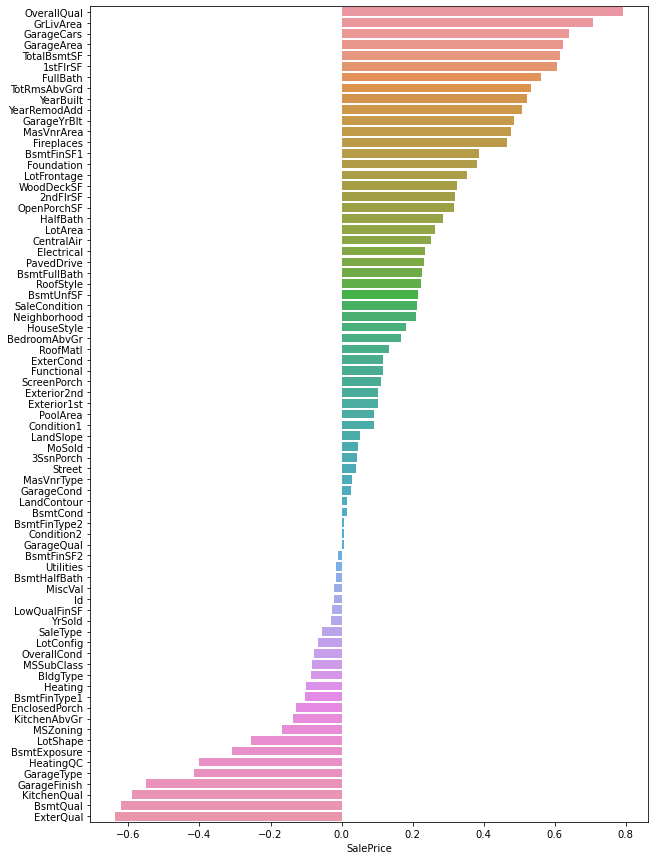

In [23]:
correlacion_objetivo = corrmat[(corrmat['SalePrice']<1)][['SalePrice']].sort_values(by='SalePrice',ascending=False)

plt.figure(figsize=(10,15)) 
sns.barplot(data=correlacion_objetivo, y = correlacion_objetivo.index, x = 'SalePrice', orient="h")
plt.show()

In [24]:
for i in nulos_objetos.union(nulos_numeros):
    correlacion_variable = corrmat[(corrmat[i]<1)][[i]].sort_values(by=i,ascending=False)
    correlacion = correlacion_objetivo.loc[i,'SalePrice']
    if correlacion<0.2:
        print(i,'SI se puede sustituir, correlación:', correlacion)
        columnas_eliminables[i]=correlacion
    else:
        print(i,'NO se puede sustituir, correlación:', correlacion)
    print('')

GarageYrBlt NO se puede sustituir, correlación: 0.4863616774878596

GarageQual SI se puede sustituir, correlación: 0.0068611674183952755

MasVnrArea NO se puede sustituir, correlación: 0.47749304709571444

GarageType SI se puede sustituir, correlación: -0.415283068452904

MasVnrType SI se puede sustituir, correlación: 0.02965839254635197

LotFrontage NO se puede sustituir, correlación: 0.35179909657067737

BsmtExposure SI se puede sustituir, correlación: -0.3090428350660052

Electrical NO se puede sustituir, correlación: 0.23471584065663967

BsmtCond SI se puede sustituir, correlación: 0.015058006077546125

BsmtFinType1 SI se puede sustituir, correlación: -0.10311370536431437

GarageFinish SI se puede sustituir, correlación: -0.5492467563332117

BsmtFinType2 SI se puede sustituir, correlación: 0.008040995809556065

BsmtQual SI se puede sustituir, correlación: -0.6208861300191685

GarageCond SI se puede sustituir, correlación: 0.02514924809958758



En el siguiente diccionario se muestra entonces las columnas que se pueden eliminar del dataset junto con su justificación. Notemos que se sustituye una de las variables anteriores ('BsmtQual') pero no importa ya que las columnas guardadas en ese diccionario se eliminarán de todas formas.

In [25]:
columnas_eliminables

{'GarageYrBlt': 'YearBuilt',
 'MasVnrArea': 'SalePrice',
 'LotFrontage': '1stFlrSF',
 'Electrical': 'YearRemodAdd',
 'BsmtFinType1': -0.10311370536431437,
 'BsmtQual': -0.6208861300191685,
 'GarageQual': 0.0068611674183952755,
 'GarageType': -0.415283068452904,
 'MasVnrType': 0.02965839254635197,
 'BsmtExposure': -0.3090428350660052,
 'BsmtCond': 0.015058006077546125,
 'GarageFinish': -0.5492467563332117,
 'BsmtFinType2': 0.008040995809556065,
 'GarageCond': 0.02514924809958758}

Ahora veamos si debemos preocuparnos por llenar los valores de alguna de las variables que tiene nulos

In [26]:
nulos_objetos.union(nulos_numeros) - set(columnas_eliminables)

set()

Vemos que no hay que preocuparnos por las variables que contienen nulos ya que todas pueden descartarse por las razones descritas anteriormente. Eliminemos entonces a las variables seleccionadas

In [27]:
df_train_pr.shape

(1460, 76)

In [28]:
# también aliminaremos "Id" ya que es solo un identificador
columnas_eliminables = list(columnas_eliminables)+['Id']
df_train_pr = df_train_pr.drop(columnas_eliminables,1)
df_train_pr.shape

(1460, 61)

In [29]:
df_train_pr.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## Regresión

Dividiendo los datos para el modelo de regresión

In [30]:
X = df_train_pr.drop(columns = ['SalePrice']).values
y = df_train_pr[['SalePrice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ejecución de los modelos

In [31]:
# Definiendo los modelos
arbol_regresion = DecisionTreeRegressor() 
random_forest_regresion = RandomForestRegressor()

# Entrenando los modelos
arbol_regresion.fit(X_train, y_train) 
random_forest_regresion.fit(X_train, y_train) 

# Realizando las predicciones
y_pred_arreg = arbol_regresion.predict(X_test)
y_pred_rfreg = random_forest_regresion.predict(X_test)

Gráfica de la predicción y errores de los modelos: 
 - Random Forest: naranja
 - Árbol de Regresión: azul

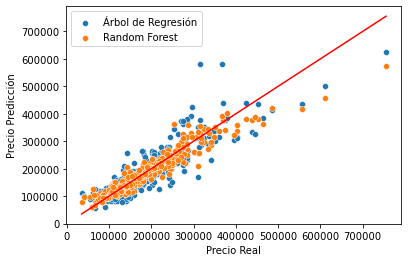

RMSE ÁrbolRegresión 39551.850910426925
RMSE RandomForest 25943.8169417327

MAE ÁrbolRegresión 26219.413242009134
MAE RandomForest 16587.878394216135

RMSLE ÁrbolRegresión 0.2009460825115531
RMSLE RandomForest 0.13812147017259366

R2 ÁrbolRegresión 0.7758200213363047
R2 RandomForest 0.9035436237223137


In [32]:
sns.scatterplot(x=y_test.flatten(), y=y_pred_arreg.flatten(), label='Árbol de Regresión') 
sns.scatterplot(x=y_test.flatten(), y=y_pred_rfreg.flatten(), label='Random Forest')
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(),color='red')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicción')
plt.show()

predicciones = {'ÁrbolRegresión':y_pred_arreg,'RandomForest':y_pred_rfreg}

for prediccion in predicciones:
    print('RMSE',prediccion,mean_squared_error(y_test,predicciones[prediccion])**0.5)
print('')
    
for prediccion in predicciones:
    print('MAE',prediccion,mean_absolute_error(y_test,predicciones[prediccion]))
print('')
    
for prediccion in predicciones:
    print('RMSLE',prediccion,mean_squared_log_error(y_test,predicciones[prediccion])**0.5)
print('')

for prediccion in predicciones:
    print('R2',prediccion,r2_score(y_test,predicciones[prediccion]))


Definitivamente el modelo random forest muestra una mejor regresión.

## Clasificación

Agregando la categoría del rango de precio

In [33]:
condiciones = [(df_train_pr['SalePrice']<=100000),
              (df_train_pr['SalePrice']>100000) & (df_train['SalePrice'] <= 500000),
             (df_train_pr['SalePrice']>500000)]
valores = ['Plow','PMedium','PHigh']
df_train_pr['CatPrice'] = np.select(condiciones, valores)

In [34]:
df_train_pr['CatPrice'].value_counts()

PMedium    1328
Plow        123
PHigh         9
Name: CatPrice, dtype: int64

In [35]:
X = df_train_pr.drop(columns = ['SalePrice','CatPrice']).values
y = df_train_pr[['CatPrice']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Forma de los conjuntos

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 60)
(438, 60)
(1022, 1)
(438, 1)


In [37]:
arbol_clasificacion = DecisionTreeClassifier() 
random_forest_clasificacion = RandomForestClassifier()

arbol_clasificacion.fit(X_train, y_train) 
random_forest_clasificacion.fit(X_train, y_train) 

y_pred_arcla = arbol_clasificacion.predict(X_test)
y_pred_rfcla = random_forest_clasificacion.predict(X_test)

#### Matrices de confusión

In [38]:
pd.DataFrame(confusion_matrix(y_test,y_pred_arcla,labels=['Plow','PMedium','PHigh']),
             columns=['Plow_P','PMedium_P','PHigh_P'],
             index=['Plow_V','PMedium_V','PHigh_V'])

,Plow_P,PMedium_P,PHigh_P
Plow_V,16,20,0
PMedium_V,17,382,0
PHigh_V,0,1,2


In [39]:
pd.DataFrame(confusion_matrix(y_test,y_pred_rfcla,labels=['Plow','PMedium','PHigh']),
             columns=['Plow_P','PMedium_P','PHigh_P'],
             index=['Plow_V','PMedium_V','PHigh_V'])

,Plow_P,PMedium_P,PHigh_P
Plow_V,19,17,0
PMedium_V,2,397,0
PHigh_V,0,2,1


recall

In [40]:
print(recall_score(y_test,y_pred_arcla,average='weighted'))
print(recall_score(y_test,y_pred_rfcla,average='weighted'))

0.91324200913242
0.952054794520548


prec

In [41]:
print(precision_score(y_test,y_pred_arcla,average='weighted'))
print(precision_score(y_test,y_pred_rfcla,average='weighted'))

0.9101894570299341
0.9505659152491345


f1

In [42]:
print(f1_score(y_test,y_pred_arcla,average='weighted'))
print(f1_score(y_test,y_pred_rfcla,average='weighted'))

0.9113936421602337
0.9457055214723927


accuracy

In [43]:
print(accuracy_score(y_test,y_pred_arcla))
print(accuracy_score(y_test,y_pred_rfcla))

0.91324200913242
0.952054794520548


In [44]:
le = preprocessing.LabelEncoder()
le.fit(y_test)

ar_auc = roc_auc_score(le.transform(y_test),arbol_clasificacion.predict_proba(X_test),multi_class='ovr')
rf_auc = roc_auc_score(le.transform(y_test),random_forest_clasificacion.predict_proba(X_test),multi_class='ovr')

print(f'Árbol de Regresión ROC AUC = {ar_auc}')
print(f'Logistic: ROC AUC = {rf_auc}')

Árbol de Regresión ROC AUC = 0.7479590831908193
Logistic: ROC AUC = 0.9769282828522701


### Curvas ROC-AUC uno vs el resto

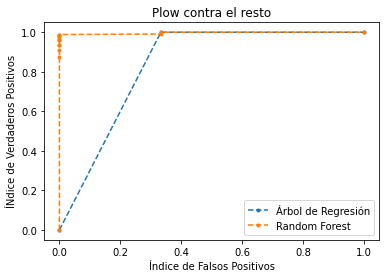

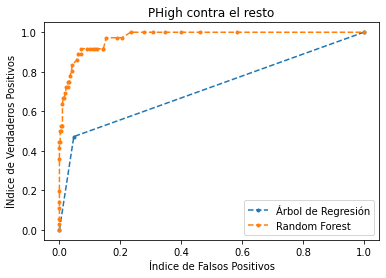

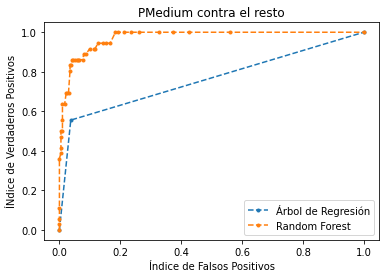

In [68]:
cambios = {'Plow':'PMedium','PHigh':'PMedium','PMedium':'PHigh'}

for i in cambios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    y_train[y_train == [cambios[i]]] = [i]
    y_test[y_test == [cambios[i]]] = [i]
    
    arbol_clasificacion = DecisionTreeClassifier() 
    random_forest_clasificacion = RandomForestClassifier()

    arbol_clasificacion.fit(X_train, y_train) 
    random_forest_clasificacion.fit(X_train, y_train) 

    y_pred_arcla = arbol_clasificacion.predict(X_test)
    y_pred_rfcla = random_forest_clasificacion.predict(X_test)
    
    le = preprocessing.LabelEncoder()
    le.fit(y_test)

    ar_fpr, ar_tpr, _ = roc_curve(le.transform(y_test), arbol_clasificacion.predict_proba(X_test)[:, 1])
    rf_fpr, rf_tpr, _ = roc_curve(le.transform(y_test), random_forest_clasificacion.predict_proba(X_test)[:, 1])

    plt.plot(ar_fpr, ar_tpr, marker='.', linestyle= '--', label='Árbol de Regresión')
    plt.plot(rf_fpr, rf_tpr, marker='.', linestyle= '--', label='Random Forest')

    plt.xlabel('Índice de Falsos Positivos')
    plt.ylabel('ÍNdice de Verdaderos Positivos')
    plt.title(f'{i} contra el resto')

    plt.legend()
    plt.show()

### Balanceo RandomOverSampler

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)

Forma de los conjuntos resampleados

In [47]:
print(X_resampled.shape)
print(y_resampled.shape)

(2787, 60)
(2787,)


In [48]:
arbol_clasificacion = DecisionTreeClassifier() 
random_forest_clasificacion = RandomForestClassifier()

arbol_clasificacion.fit(X_resampled, y_resampled) 
random_forest_clasificacion.fit(X_resampled, y_resampled) 

y_pred_arcla = arbol_clasificacion.predict(X_test)
y_pred_rfcla = random_forest_clasificacion.predict(X_test)

#### Matrices de confusión

In [49]:
pd.DataFrame(confusion_matrix(y_test,y_pred_arcla,labels=['Plow','PMedium','PHigh']),
             columns=['Plow_P','PMedium_P','PHigh_P'],
             index=['Plow_V','PMedium_V','PHigh_V'])

,Plow_P,PMedium_P,PHigh_P
Plow_V,18,18,0
PMedium_V,21,376,2
PHigh_V,0,2,1


In [50]:
pd.DataFrame(confusion_matrix(y_test,y_pred_rfcla,labels=['Plow','PMedium','PHigh']),
             columns=['Plow_P','PMedium_P','PHigh_P'],
             index=['Plow_V','PMedium_V','PHigh_V'])

,Plow_P,PMedium_P,PHigh_P
Plow_V,21,15,0
PMedium_V,6,392,1
PHigh_V,0,3,0


recall

In [51]:
print(recall_score(y_test,y_pred_arcla,average='weighted'))
print(recall_score(y_test,y_pred_rfcla,average='weighted'))

0.9018264840182648
0.9429223744292238


prec

In [52]:
print(precision_score(y_test,y_pred_arcla,average='weighted'))
print(precision_score(y_test,y_pred_rfcla,average='weighted'))

0.9051686517439943
0.9348925270074617


f1

In [53]:
print(f1_score(y_test,y_pred_arcla,average='weighted'))
print(f1_score(y_test,y_pred_rfcla,average='weighted'))

0.9034220728870511
0.9376026550620586


accuracy

In [54]:
print(accuracy_score(y_test,y_pred_arcla))
print(accuracy_score(y_test,y_pred_rfcla))

0.9018264840182648
0.9429223744292238


### Métrica ROC-AUC uno vs el resto

In [55]:
le = preprocessing.LabelEncoder()
le.fit(y_test)

ar_auc = roc_auc_score(le.transform(y_test),arbol_clasificacion.predict_proba(X_test),multi_class='ovr')
rf_auc = roc_auc_score(le.transform(y_test),random_forest_clasificacion.predict_proba(X_test),multi_class='ovr')

print(f'Árbol de Regresión ROC AUC = {ar_auc}')
print(f'Logistic: ROC AUC = {rf_auc}')

Árbol de Regresión ROC AUC = 0.7010053671862595
Logistic: ROC AUC = 0.9814921581633621


### Curvas ROC-AUC uno vs el resto

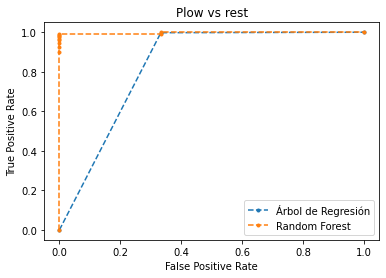

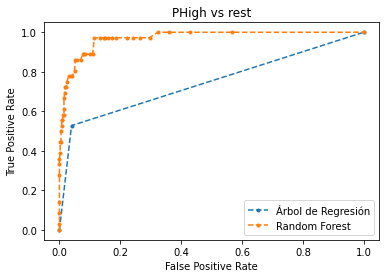

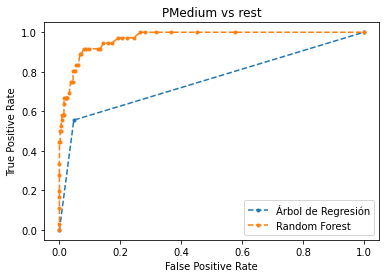

In [56]:
cambios = {'Plow':'PMedium','PHigh':'PMedium','PMedium':'PHigh'}

for i in cambios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    y_train[y_train == [cambios[i]]] = [i]
    y_test[y_test == [cambios[i]]] = [i]
    
    arbol_clasificacion = DecisionTreeClassifier() 
    random_forest_clasificacion = RandomForestClassifier()

    arbol_clasificacion.fit(X_train, y_train) 
    random_forest_clasificacion.fit(X_train, y_train) 

    y_pred_arcla = arbol_clasificacion.predict(X_test)
    y_pred_rfcla = random_forest_clasificacion.predict(X_test)
    
    le = preprocessing.LabelEncoder()
    le.fit(y_test)

    ar_fpr, ar_tpr, _ = roc_curve(le.transform(y_test), arbol_clasificacion.predict_proba(X_test)[:, 1])
    rf_fpr, rf_tpr, _ = roc_curve(le.transform(y_test), random_forest_clasificacion.predict_proba(X_test)[:, 1])

    plt.plot(ar_fpr, ar_tpr, marker='.', linestyle= '--', label='Árbol de Regresión')
    plt.plot(rf_fpr, rf_tpr, marker='.', linestyle= '--', label='Random Forest')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{i} vs rest')

    plt.legend()
    plt.show()

### Balanceo SMOTE

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [58]:
print(X_resampled.shape)
print(y_resampled.shape)

(2787, 60)
(2787,)


In [59]:
arbol_clasificacion = DecisionTreeClassifier() 
random_forest_clasificacion = RandomForestClassifier()

arbol_clasificacion.fit(X_resampled, y_resampled) 
random_forest_clasificacion.fit(X_resampled, y_resampled) 

y_pred_arcla = arbol_clasificacion.predict(X_test)
y_pred_rfcla = random_forest_clasificacion.predict(X_test)

In [60]:
pd.DataFrame(confusion_matrix(y_test,y_pred_arcla,labels=['Plow','PMedium','PHigh']),
             columns=['Plow_P','PMedium_P','PHigh_P'],
             index=['Plow_V','PMedium_V','PHigh_V'])

,Plow_P,PMedium_P,PHigh_P
Plow_V,23,13,0
PMedium_V,25,372,2
PHigh_V,0,2,1


In [61]:
pd.DataFrame(confusion_matrix(y_test,y_pred_rfcla,labels=['Plow','PMedium','PHigh']),
             columns=['Plow_P','PMedium_P','PHigh_P'],
             index=['Plow_V','PMedium_V','PHigh_V'])

,Plow_P,PMedium_P,PHigh_P
Plow_V,28,8,0
PMedium_V,9,390,0
PHigh_V,0,2,1


recall

In [62]:
print(recall_score(y_test,y_pred_arcla,average='weighted'))
print(recall_score(y_test,y_pred_rfcla,average='weighted'))

0.9041095890410958
0.95662100456621


prec

In [63]:
print(precision_score(y_test,y_pred_arcla,average='weighted'))
print(precision_score(y_test,y_pred_rfcla,average='weighted'))

0.9173170861208453
0.9572334320621991


f1

In [64]:
print(f1_score(y_test,y_pred_arcla,average='weighted'))
print(f1_score(y_test,y_pred_rfcla,average='weighted'))

0.9095746005188649
0.9557724388550053


accuracy

In [65]:
print(accuracy_score(y_test,y_pred_arcla))
print(accuracy_score(y_test,y_pred_rfcla))

0.9041095890410958
0.95662100456621


In [66]:
le = preprocessing.LabelEncoder()
le.fit(y_test)

ar_auc = roc_auc_score(le.transform(y_test),arbol_clasificacion.predict_proba(X_test),multi_class='ovr')
rf_auc = roc_auc_score(le.transform(y_test),random_forest_clasificacion.predict_proba(X_test),multi_class='ovr')

print(f'Árbol de Regresión ROC AUC = {ar_auc}')
print(f'Logistic: ROC AUC = {rf_auc}')

Árbol de Regresión ROC AUC = 0.742191818133119
Logistic: ROC AUC = 0.985347199283868


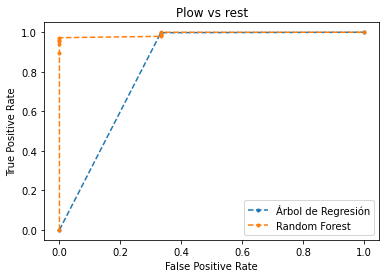

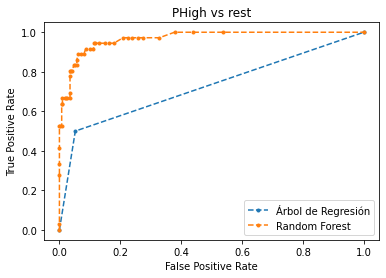

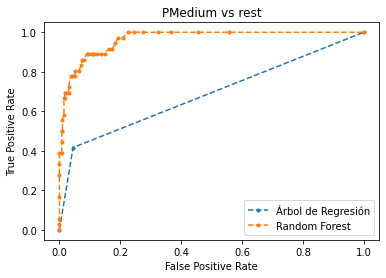

In [67]:
cambios = {'Plow':'PMedium','PHigh':'PMedium','PMedium':'PHigh'}

for i in cambios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    y_train[y_train == [cambios[i]]] = [i]
    y_test[y_test == [cambios[i]]] = [i]
    
    arbol_clasificacion = DecisionTreeClassifier() 
    random_forest_clasificacion = RandomForestClassifier()

    arbol_clasificacion.fit(X_train, y_train) 
    random_forest_clasificacion.fit(X_train, y_train) 

    y_pred_arcla = arbol_clasificacion.predict(X_test)
    y_pred_rfcla = random_forest_clasificacion.predict(X_test)
    
    le = preprocessing.LabelEncoder()
    le.fit(y_test)

    ar_fpr, ar_tpr, _ = roc_curve(le.transform(y_test), arbol_clasificacion.predict_proba(X_test)[:, 1])
    rf_fpr, rf_tpr, _ = roc_curve(le.transform(y_test), random_forest_clasificacion.predict_proba(X_test)[:, 1])

    plt.plot(ar_fpr, ar_tpr, marker='.', linestyle= '--', label='Árbol de Regresión')
    plt.plot(rf_fpr, rf_tpr, marker='.', linestyle= '--', label='Random Forest')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{i} vs rest')

    plt.legend()
    plt.show()